In [1]:
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ellipsoid = skimage.draw.ellipsoid(6, 10, 16, levelset=True)

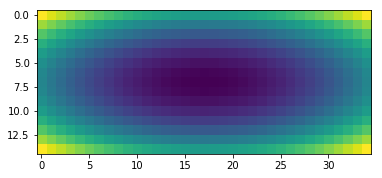

In [4]:
plt.imshow(ellipsoid[:, 12,:])

In [5]:
ellipsoid.shape

(15, 23, 35)

In [6]:
ellipsoid.max(), ellipsoid.min()

(2.7000173611111116, -1.0)

In [7]:
mask = np.ones_like(ellipsoid, dtype=int)
mask[:10, :, :]  = 0
mask[:, :, 20:]  = 0

ver, sim, _, _ = skimage.measure.marching_cubes_lewiner(ellipsoid, 0, mask=mask)
ver.shape, mask.sum()

((454, 3), 2300)

<IPython.core.display.Javascript object>


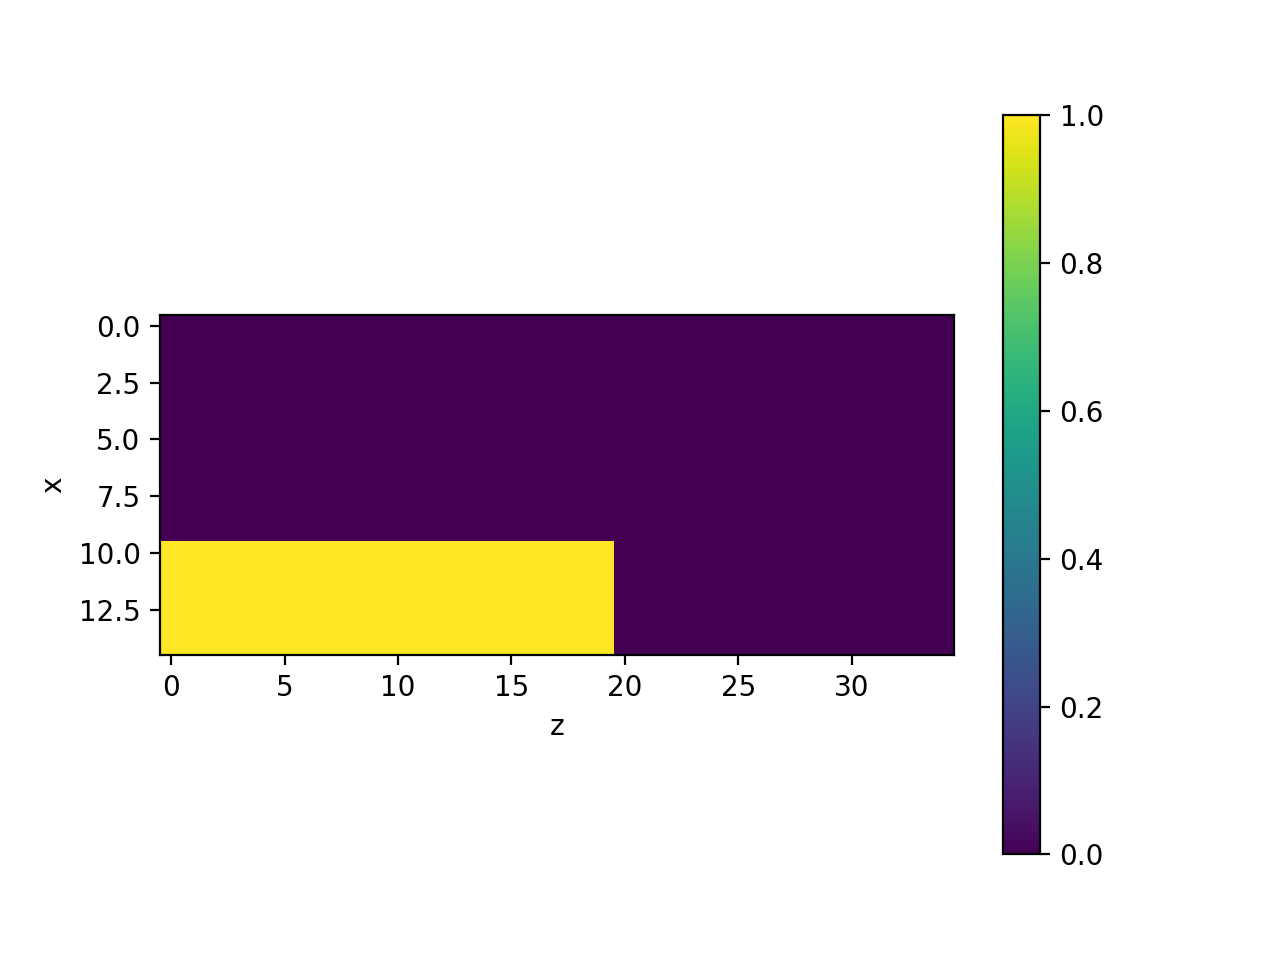

In [35]:
plt.imshow(mask[:,4, :])
plt.xlabel('z')
plt.ylabel('x')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


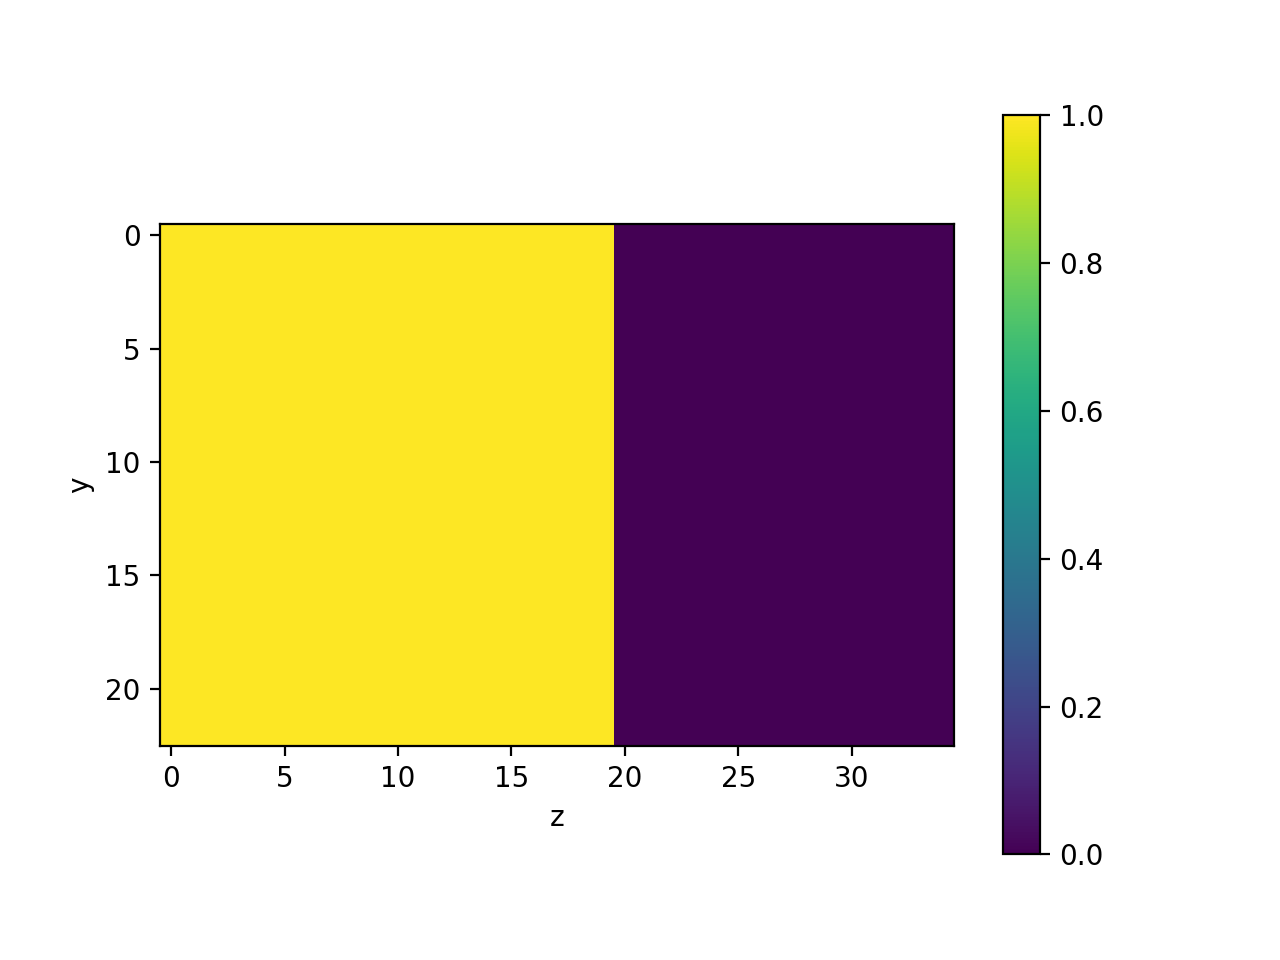

In [34]:
plt.imshow(mask[11,:, :])
plt.xlabel('z')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [10]:
ver, sim, _, _ = skimage.measure.marching_cubes_lewiner(ellipsoid, 0, mask=None)

Text(0.5, 0, 'z')

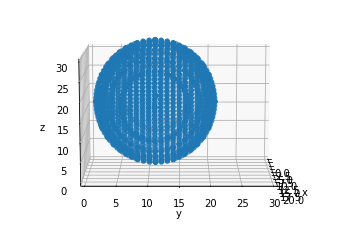

In [11]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(ver[:, 0], ver[:, 1], ver[:, 2])
ax.view_init(elev=10., azim=0)
ax.set_zlim(0,30)

ax.set_xlim(0,20)
ax.set_ylim(0,30)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [25]:
ver, sim, _, _ = skimage.measure.marching_cubes_lewiner(ellipsoid, 0, mask=mask)
ver.shape, mask.sum()

((454, 3), 2300)

<IPython.core.display.Javascript object>


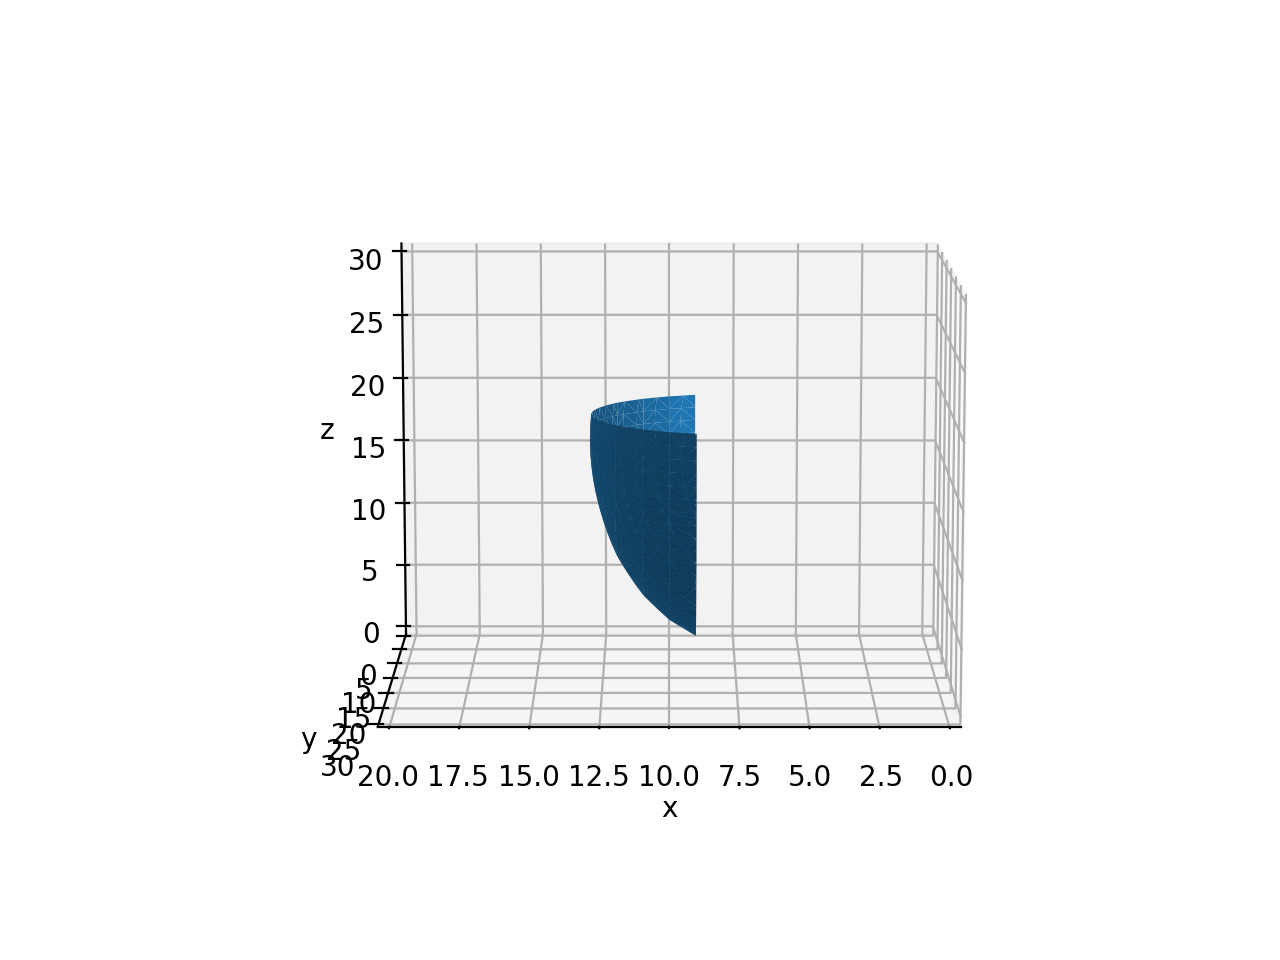

Text(0.5, 0, 'z')

In [36]:
%matplotlib notebook
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(ver[:, 0], ver[:, 1], ver[:, 2], triangles=sim)
ax.view_init(elev=10., azim=90)
ax.set_zlim(0,30)
ax.set_xlim(0,20)
ax.set_ylim(0,30)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [37]:
skimage.measure.mesh_surface_area(ver, sim)

299.56878662109375